# Classification des données LIPD par PointNet




In [1]:
import numpy as np
import glob
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Chargement de dataset
Nous utilisons le jeu de données Laser and Image Pedestrian Detection Dataset in Urban Environment (LIPD dataset), contenant deux classes (piéton et non-poiéton).

## Fichiers pré-traités

In [2]:
points_test = []

cord =[]

files_trains = glob.glob('/content/drive/MyDrive/DATA_PFE/train_data.txt')
files_test = glob.glob('/content/drive/MyDrive/DATA_PFE/test_data.txt')

points_train = np.loadtxt(files_trains[0],dtype=float)
points_test = np.loadtxt(files_test[0],dtype=float)

##La mise en forme de dataset

In [25]:
points_train = points_train.reshape(1100,613,3)
points_test = points_test.reshape(1400,613,3)

print(" ********** La taille ************")

print("les donnés de train : ",len(points_train))
print("les donnés de test  : ", len(points_test))

print(" ********** Le shape ************")
print(points_train.shape)
print(points_test.shape)

 ********** La taille ************
les donnés de train :  1100
les donnés de test  :  1400
 ********** Le shape ************
(1100, 613, 3)
(1400, 613, 3)


##Labeliser dataset

In [4]:
train_labels = []
test_labels = []

for i in range(550):
  train_labels.append(1)

for i in range(550):
  train_labels.append(0)

for i in range(400):
  test_labels.append(1)

for i in range(1000):
  test_labels.append(0)

 ## Le nombre des donnés de test et d'entraînement
 

In [5]:

print("les donnés de test : ",len(points_test))
print("les donnés d'entrainement: ", len(points_train))


les donnés de test :  1400
les donnés d'entrainement:  1100


##  L'affichage du premier élément d'entraînement en 2D

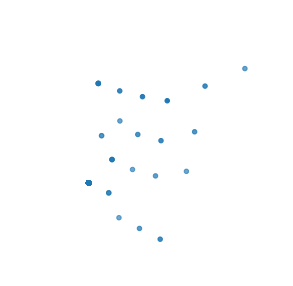

le nombre des points de premier élément est :613


In [17]:
# l'affichage des points de premier pièton 
points = points_train[0]
points = np.array(points)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()
plt.show()

print("le nombre des points de premier élément est :{}".format(len(points_train[0])))


##  L'affichage du premier élément d'entraînement en 3D

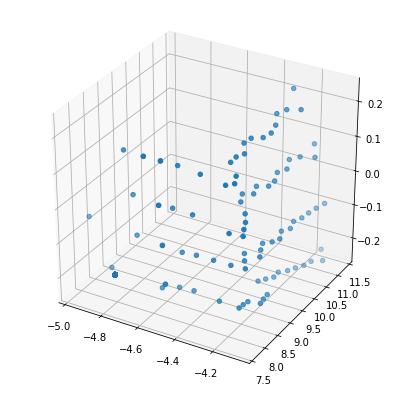

In [20]:
def plot_pc(points, angle1=30,angle2=45, train_labels=None):
  # omit angles for now
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection="3d")
  #ax = fig.add_subplot(2, 8, i + 1, projection="3d")
  ax.scatter(points[:, 0], points[:, 1], points[:, 2])
  if train_labels:
    plt.title(" label de {} est :{}".format(i ,lebels[i]))
  plt.show()

for i in range(1):
  idx = np.random.randint(0,1400)
  plot_pc(points_train[idx],train_labels[i])

##L'affichages des piétons

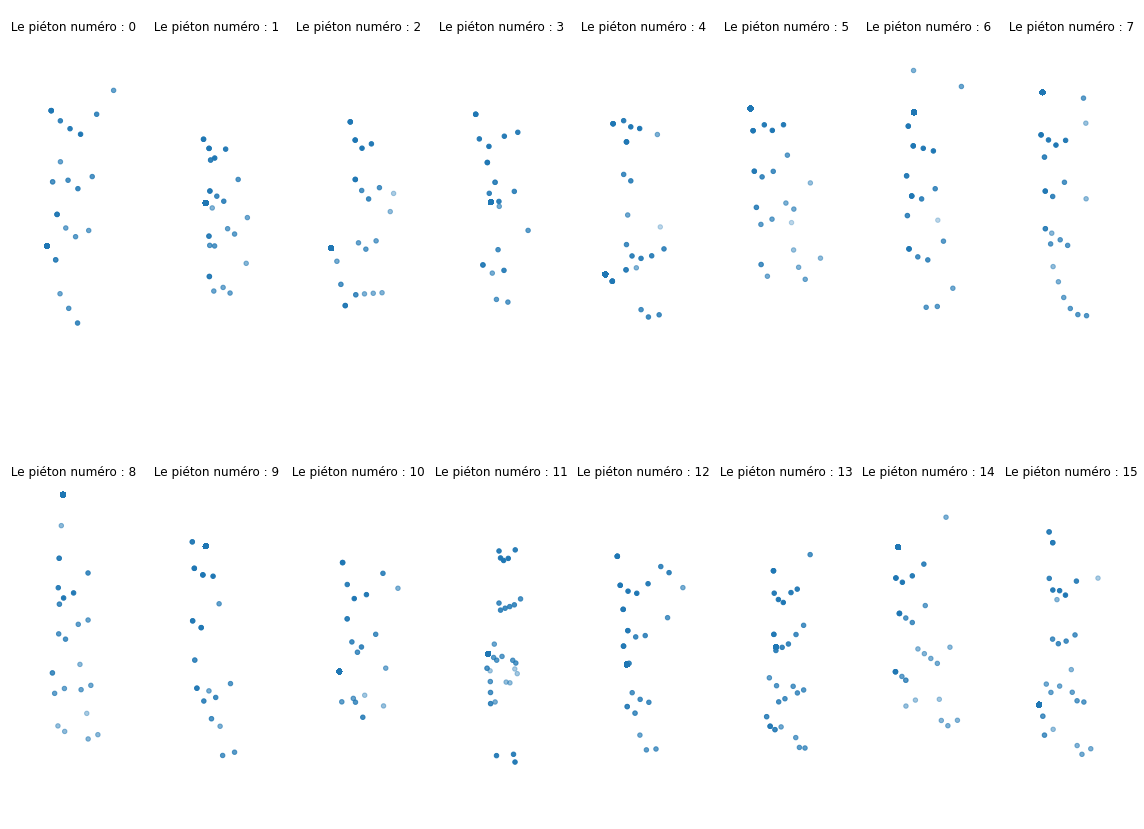

In [28]:
points = points_train[0:16]
lebels = train_labels[0:16]

fig = plt.figure(figsize=(20, 15))
for i in range(16):
    ax = fig.add_subplot(2, 8, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(" Le piéton numéro : {}".format(i))
    ax.set_axis_off()
plt.show()

##L'affichage des non piétons

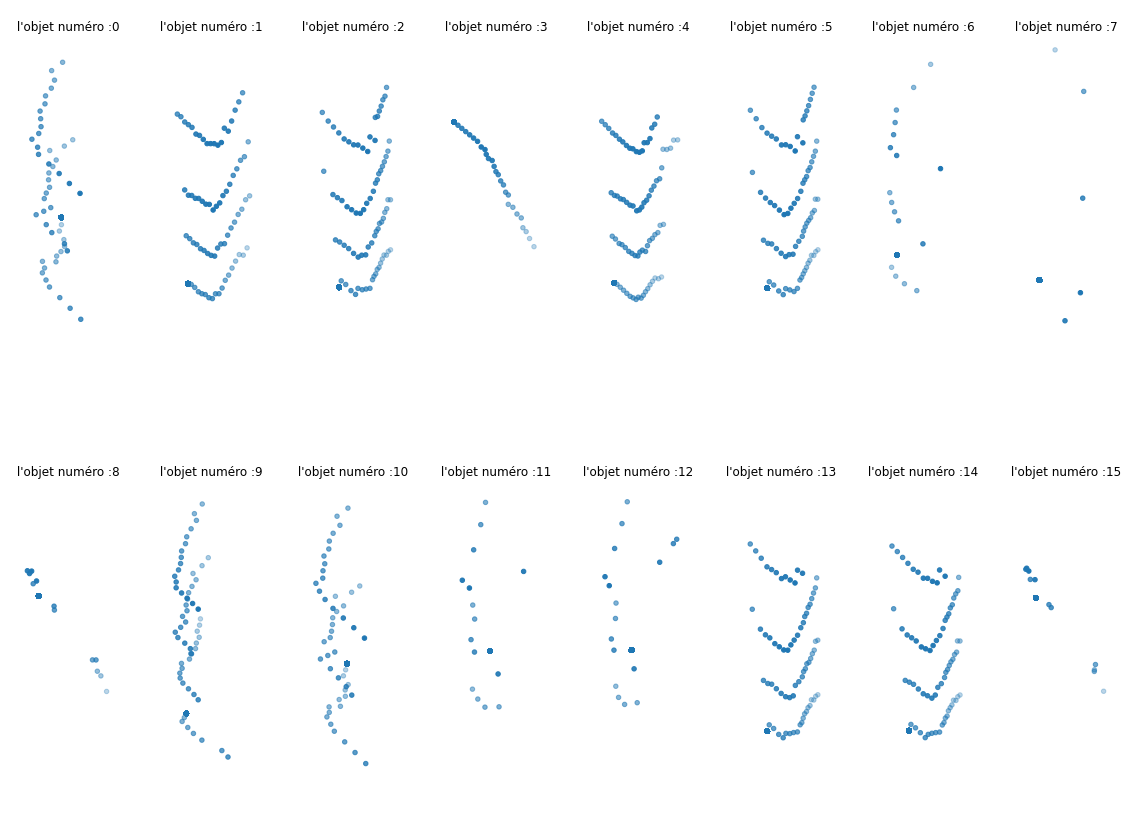

In [29]:
points = points_train[550:566]
lebels = train_labels[550:566]

fig = plt.figure(figsize=(20, 15))
for i in range(16):
    ax = fig.add_subplot(2, 8, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(" l'objet numéro :{}".format(i))
    ax.set_axis_off()
plt.show()

#Normalisation des données 
Normalisation : La normalisation est une méthode de prétraitement des données qui permet de réduire la complexité des modèles. C’est également un préalable à l’application de certains algorithmes. 

1er Formule de la normalisation :
$$
\text { Valeur Normalisée }=\frac{\text { Valeur }-\text { Minimum }}{\text { Maximum }-\text { Minimum }}
$$

2émme Formule de la normalisation :
$$
\text { Valeur Normalisée }=\frac{\text { Valeur }}{\text { Maximum }}
$$

In [ ]:
# Normalisation par 1er formule :
points_train_norm_1 = (points_train - points_train.min())/(points_train.max()- points_train.min())
points_test_norm_1 = (points_test - points_test.min())/(points_test.max()- points_test.min())


In [ ]:
# Normalisation par l
points_train_norm = points_train/points_train.max()
points_test_norm = points_test/points_test.max()


 ## L'affichage de même élément d'entraînement aprés la normalisation


In [32]:
# # l'affichage des points de premier pièton 
# points = points_train_norm_1[0]


# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# ax.set_axis_off()
# plt.show()
# print("le nombres des points de premier élément est : {}".format(len(points_train[0])))


NameError: ignored

Nos données peuvent maintenant être lues dans un objet tf.data.Dataset(). Nous définissons la taille du tampon de brassage à la taille totale de l'ensemble de données, car avant cela, les données sont classées par classe. L'augmentation des données est importante lorsque l'on travaille avec des données de nuages de points. Nous créons une fonction d'augmentation pour secouer et mélanger l'ensemble de données de formation.



In [33]:
NUM_POINTS = 613
NUM_CLASSES = 2
BATCH_SIZE = 256
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((points_train, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((points_test, test_labels))

train_dataset = train_dataset.shuffle(len(points_train)).map(augment).batch(BATCH_SIZE)

#train_dataset = train_dataset.shuffle(len(points_train_norm_1)).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(points_test)).batch(BATCH_SIZE)

# L'affichage aprés le mélange des données

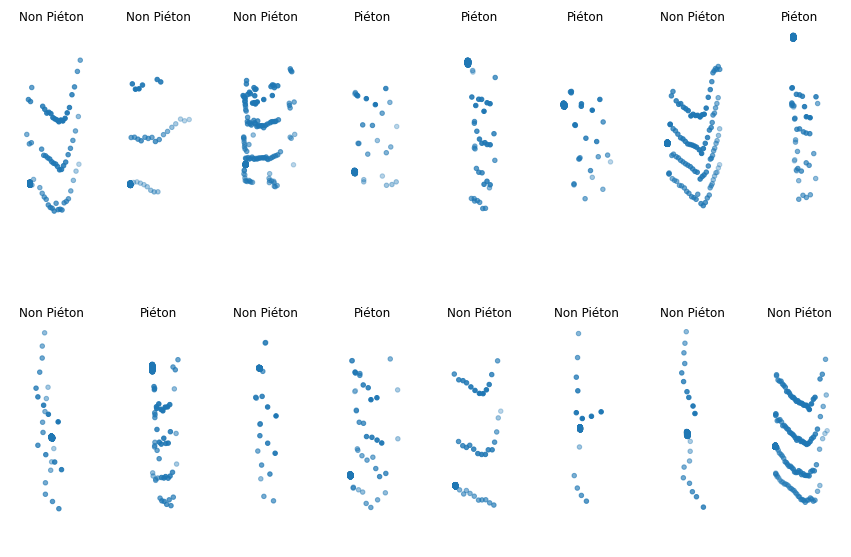

613

In [38]:
data_train = train_dataset.take(1)


points, labels = list(train_dataset)[0]
points = points[:16]
labels = labels[:16]

points = points.numpy()

fig = plt.figure(figsize=(15, 10))
for i in range(16):
  nom = "Non Piéton"
  ax = fig.add_subplot(2, 8, i + 1, projection="3d")
  ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])

  if labels[i].numpy()==1:
    nom = "Piéton"

  ax.set_title(nom)
  ax.set_axis_off()
plt.show()



#Construction de model :

In [39]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)



In [40]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))



In [41]:

def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])



In [42]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()


Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 613, 3)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 613, 32)      128         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 613, 32)     128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 613, 32)      0           ['batch_normalization[0][0

#l'entraînement de model

In [43]:
#test_dataset = test_dataset.take(10)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

histrory = model.fit(train_dataset, epochs=20,validation_data=test_dataset)

Epoch 1/20
5/5 [==============================] - 22s 1s/step - loss: 14.7251 - sparse_categorical_accuracy: 0.7736 - val_loss: 11.2791 - val_sparse_categorical_accuracy: 0.8021
Epoch 2/20
5/5 [==============================] - 5s 970ms/step - loss: 10.1127 - sparse_categorical_accuracy: 0.9418 - val_loss: 9.3925 - val_sparse_categorical_accuracy: 0.8414
Epoch 3/20
5/5 [==============================] - 5s 988ms/step - loss: 8.6482 - sparse_categorical_accuracy: 0.9573 - val_loss: 8.8212 - val_sparse_categorical_accuracy: 0.8564
Epoch 4/20
5/5 [==============================] - 5s 966ms/step - loss: 8.3859 - sparse_categorical_accuracy: 0.9509 - val_loss: 8.7440 - val_sparse_categorical_accuracy: 0.8536
Epoch 5/20
5/5 [==============================] - 5s 967ms/step - loss: 8.2765 - sparse_categorical_accuracy: 0.9627 - val_loss: 8.6996 - val_sparse_categorical_accuracy: 0.8571
Epoch 6/20
5/5 [==============================] - 5s 974ms/step - loss: 8.2464 - sparse_categorical_accuracy:

##L'affichage des courbes de Loss et Accuracy

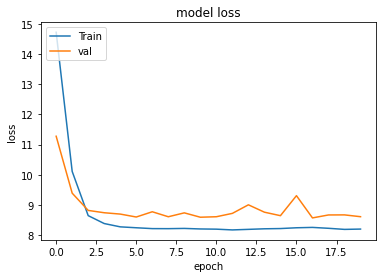

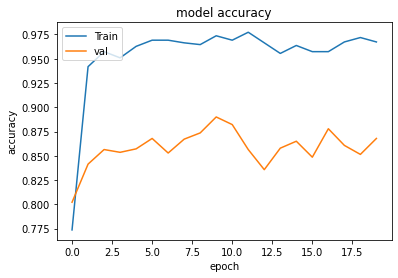

In [44]:
loss_curve = histrory.history['loss']
acc_curve = histrory.history['sparse_categorical_accuracy']

loss_val_curve = histrory.history['val_loss']
acc_val_curve = histrory.history['val_sparse_categorical_accuracy']

plt.plot(loss_curve,label = 'Train')
plt.plot(loss_val_curve,label = 'val')
plt.legend(loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(acc_curve,label = 'Train')
plt.plot(acc_val_curve,label = 'val')
plt.legend(loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

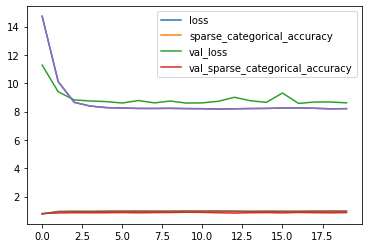

In [45]:
import pandas as pd 
pd.DataFrame(histrory.history).plot()
plt.plot(histrory.history['loss'])
plt.plot(histrory.history['sparse_categorical_accuracy'])

## La prédiction de quelques élement de test

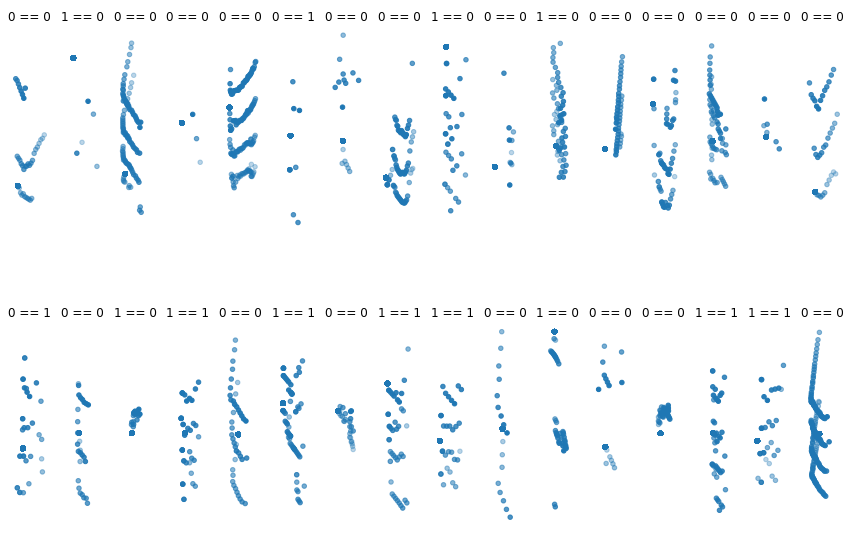

In [47]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:32]
labels = labels[:32]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(32):
    ax = fig.add_subplot(2, 16, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title("{} == {}".format(preds[i].numpy(),list(labels)[i]))
    ax.set_axis_off()
plt.show()


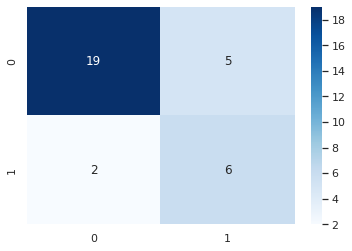

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, preds)

import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [51]:
print("l'accuracy de modele est :", np.trace(cm) / np.sum(cm))

l'accuracy de modele est : 0.78125
